In [1]:
#Please Run all cells in order and one by one to use each interactive plot separately.

In [31]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
#code in this cell is from https://mljar.com/blog/jupyter-notebook-hide-code/

# Expected Value Time Evolution.

This notebook's purpose is to visualize, exemplify and expand the results of exercise 3.3:

3.3 - The Hamiltonian of a one-dimensional quantum system has an orthonormal set of eigenfunctions, n(x), with known eigenvalues, $E_n$. The operator Q is an observable for which:   

$$
Q\Phi_1(x) = \Phi_2(x); \; Q\Phi_2(x) = \Phi_1(x); \; Q\Phi_n(x)=0, \: \forall n \geq 3    
$$

a) Find the orthonormal eigenfunctions of $Q$ with eigenvalues $+1$ and $-1$, and express them in the $\Phi_n(x)$ basis.    
Assume now that at $t = 0$, $\Psi(x, 0)$ coincides with the eigenfunction of $Q$ with eigenvalue $+1$.    
b) Find $\Psi(x, t)$.    
c) Compute the expectation value of $Q$ at any later time $t$, $\langle Q\rangle_t$.    
d) What is the probability of obtaining $-1$ if one measures Q at time t?    


To solve a), we must consider that $\phi_+$ and $\phi_-$ are normalized lineal combinations of the Hamiltonian's eigenstates.

$$
\phi_+ = \sum a_n\Phi_n \implies Q \phi_+ = a_1 \Phi_2 + a_2 \Phi_1 = \sum a_n\Phi_n \\    
\phi_- = \sum b_n\Phi_n \implies Q \phi_- = b_1 \Phi_2 + b_2 \Phi_1 = - \sum b_n\Phi_n
$$

From these equations and imposing normalization, we obtain:

$$
\phi_+ = \frac{1}{\sqrt{2}}\Phi_1 + \frac{1}{\sqrt{2}}\Phi_2 \hspace{1.5cm} \phi_- = \frac{1}{\sqrt{2}}\Phi_1 - \frac{1}{\sqrt{2}}\Phi_2
$$

    
To solve b), we use Schrödinger's equation to calculate the phase evolution of each eigenstate. If we also take into account that the total wave function's phase is arbitrary, we obtain:
$$
\Psi(x,0) = \phi_+ = \frac{1}{\sqrt{2}}\Phi_1 + \frac{1}{\sqrt{2}}\Phi_2 \implies \Psi(x,t) = \frac{1}{\sqrt{2}} e^{-i\frac{E_1}{\hbar}t}\Phi_1 + \frac{1}{\sqrt{2}}e^{-i\frac{E_2}{\hbar}t}\Phi_2 = 
\frac{1}{2} \left[ \left( 1 + \exp{i\frac{E_2-E_1}{\hbar}t} \right) \phi_+ +
\left( 1 - \exp{i\frac{E_2-E_1}{\hbar}t} \right) \phi_- \right]
$$
    
To solve section c), we can compute the expected value for Q operator.

$$
\langle Q \rangle = |\langle \Psi | \phi_+ \rangle|^2 - |\langle \Psi | \phi_- \rangle|^2 = \cos\left(\frac{E_2-E_1}{\hbar}t\right)
$$
    
We finally calculate the probability of measuring $Q:-1$ to solve section d).

$$
P(Q:-1)_{\Psi(x,t)} = |\langle \Psi | \phi_- \rangle|^2 = \frac{1-\cos\left( \frac{E_2-E_1}{\hbar}t \right)}{2}
$$

## Example functions and operator

This exercise can be exemplified by two analytic functions as $\Phi_1$ and $\Phi_2$ and the momentum operator as $Q$:

$$
\Phi_1 = e^{i2\pi x} \hspace{1.5cm} \Phi_2 = e^{-i2\pi x} \hspace{1.5cm} Q = P = -i\partial_x
$$

These examples verify the conditions seen before:
$$
P\Phi_1(x) = \Phi_2(x) \hspace{1.5cm} P\Phi_2(x) = \Phi_1(x)
$$

Applying the results we found solving the problem, the eigenfunctions of the P operator are:

$$
\phi_+ = \sqrt{2} \cos{2\pi x} \hspace{1.5cm} \phi_- = \sqrt{2} \ i \sin{2\pi x}
$$
    
    
This example is analogus to the solution of a real problem, using $\varphi$ instead of x and $L$ instead of $P$. We will see how these operators are used at a later stage of this course.    

If we take $E_2 = 2 E_1$, we obtain the following representations:

## 2D representation of $ψ(x,t)$
In the following figure, the time dependent real and imaginary parts of the wave function are shown.

<IPython.core.display.Javascript object>


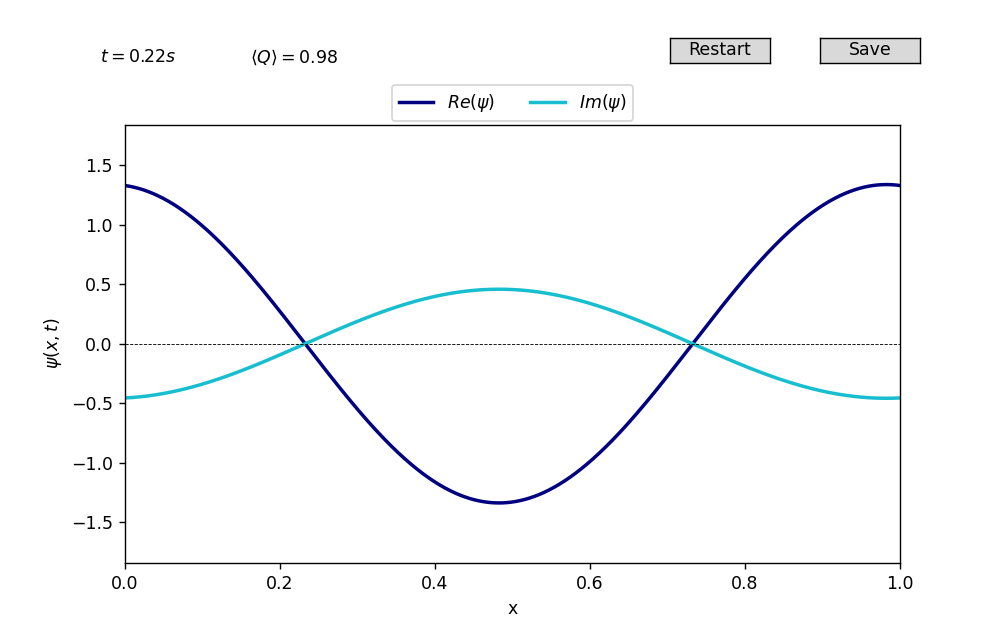

In [35]:
import numpy as np
from numpy.polynomial.hermite import Hermite
from math import factorial
from numpy import pi, sin, cos, exp, sqrt
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We activate the interactive mode in order to display animations
%matplotlib notebook

#We define the time dependent wave function
def expected_Q(t):
    expected_Q = np.abs((exp(-I*t) + exp(-I*t*2))/2)**2 - np.abs((exp(-I*t) - exp(-I*t*2))/2)**2
    return expected_Q

def Psi_proj_1(X,t):
    Psi_proj_1 = 1/sqrt(2) * exp(-I*t) * exp(I*2*pi*X)
    return Psi_proj_1

def Psi_proj_2(X,t):
    Psi_proj_2 = 1/sqrt(2) * exp(-I*t*2) * exp(-I*2*pi*X) 
    return Psi_proj_2

def Psi1(X,t):
    Psi1 = Psi_proj_1(X,t) + Psi_proj_2(X,t)
    return Psi1

#Program constants
I = complex(0,1)

# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin*1.3, ymax*1.3

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_2D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.67,0.90,0.1,0.04])
        b_reset = Button(ax_reset, 'Restart', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0 - dt
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.82,0.90,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Phase_difference_animated_Re_vs_Im.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_save
        
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0
        
#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$ψ(x,t)$')
        ax.legend(bbox_to_anchor=(0., 1.01, 1.,.102),loc = 'upper center',ncol=2)
        ax.axhline(y = 0,color = 'black',linestyle = '--',lw = 0.5)
        
#       We compute the initial information
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t0)
        
#       We use the initial function limits
        ymin, ymax = find_lims_abs(np.abs(Y))
        ax.set_xlim(x0,xf)
        ax.set_ylim(ymin,ymax)
        
#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))  
        
        #We return all line functions
        return line1, line2
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame
        global t,X,Y
        t = t + dt
        X = np.linspace(x0,xf,1000)
        Y = Psi(X,t)

#       We actualize the time and phi annotations
        time_annotation.set_text("$t = {:10.2f} s $".format(t))
        Q_annotation.set_text("$⟨Q⟩ = {:10.2f}$".format(expected_Q(t)))

#       We represent both functions
        line1.set_data(X, np.real(Y))
        line2.set_data(X, np.imag(Y))      
        
        #We return all line functions
        return line1, line2
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global x0,xf,t,dt
    n1 = 0
    n2 = 1
    phi = 0

    #We initialize figure's variables
    t = 0
    dt = 0.01
    
    x0 = 0
    xf = 1
    
    #We define figure's axes and main line
    fig, ax = plt.subplots(figsize=(8,5),dpi=100)
    fig.subplots_adjust(bottom = 0.1, top = 0.80)
    line1, = ax.plot([], [], lw=2, color = 'navy', label = '$Re(ψ)$')
    line2, = ax.plot([], [], lw=2, color = 'tab:cyan', label = '$Im(ψ)$')    
    
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)
       
    #We generate the two buttons
    b_reset, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.2f} s $".format(t), xy=(0.10, 0.90), xycoords="figure fraction")
    Q_annotation = ax.annotate("$⟨Q⟩ = {:10.2f}$".format(expected_Q(t)), xy=(0.25, 0.90), xycoords="figure fraction")
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_save = animate_interactive_Psi_2D(Psi1,t0,total_frames)

## 3D representation of $ψ(u,t)$
In the following figure, the time dependent real and imaginary parts of the wave function are shown in a 3D plot. The two eigenfunctions that compose the wave function are also shown. Please note that $\Delta\phi_0 = \phi$ and $|\Delta\phi|$ is the phase difference of the two components.
$$\Psi(x,t) = \frac{1}{\sqrt{2}}\left(e^{-i\frac{E_{n_1}}{\hbar}t}\Phi_{n_1}(x) + e^{i\left(\phi - \frac{E_{n_2}}{\hbar}t \right)}\Phi_{n_2}(x)\right)$$

<IPython.core.display.Javascript object>


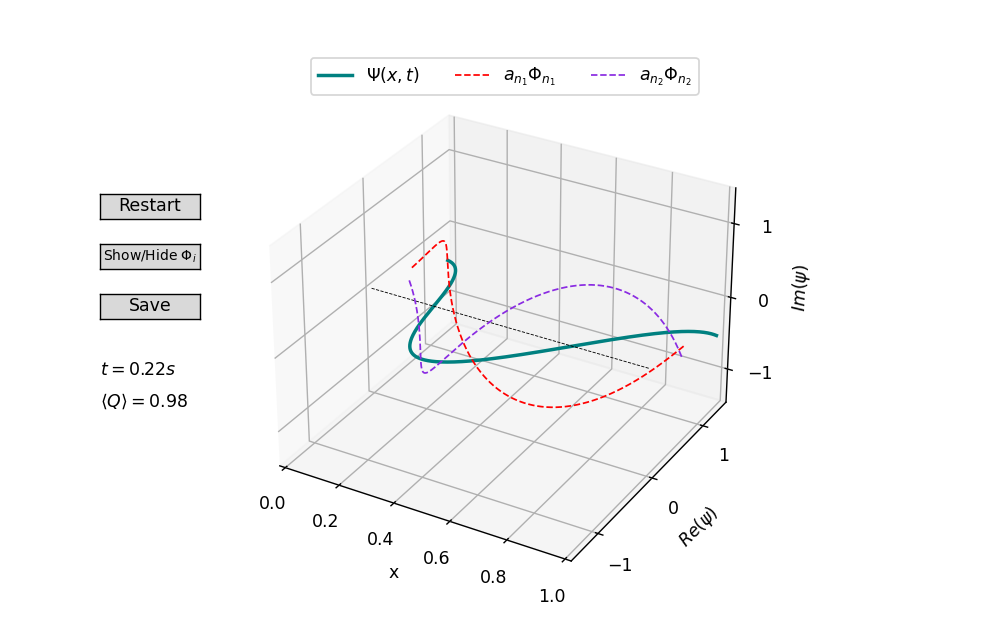

In [36]:
from matplotlib.animation import FuncAnimation
from matplotlib.animation import PillowWriter

#We enable the interactive mode for the next graphic
%matplotlib notebook

# -----------------------------------------------------------------------------------------------

def find_lims_abs(Y):
#Input: Y, Array of Real numbers 
#Output: lim_inf, lim_sup, limits for a graphic representation of the imaginary and real part of Y (wavefunction array)
    ymax = np.max(Y)
    ymin = -ymax
    lim_inf, lim_sup = ymin, ymax

    return lim_inf, lim_sup

# -----------------------------------------------------------------------------------------------

def animate_interactive_Psi_3D(Psi,t0,total_frames):
# Input: Psi(X,t), wave function we want to represent (function of the array X and the time t).
#                  this wave function must have n,a,k as implicit parameters
# Output: fig (figure), b_reset, b_save (two buttons). These output variables must be referenced in the main program.
#         the data will be shown automatically as an interactive plot when the function is executed.
    
        # ------------------------------------------------------------

    #We define some wrapped functions to have a better program structure 
    def generate_buttons():
    #This function defines and specifies the details of the buttons needed in this interactive plot
    #Any details referring the definition and graphic details of the buttons must be changed inside this function
        #We create an axis for the reset button and define its widget
        ax_reset = fig.add_axes([0.1,0.65,0.1,0.04])
        b_reset = Button(ax_reset, 'Restart', hovercolor='0.975')
        
        def reset(event):
        #Resets all sliders and time
            global t
            t = t0
            ax.view_init()
            return
        #We call the reset function when the reset button is used
        b_reset.on_clicked(reset)
        
        
        #We create an axis for the projections button and define its widget
        ax_projections = fig.add_axes([0.1,0.57,0.1,0.04])
        b_projections = Button(ax_projections, 'Show/Hide $\Phi_i$', hovercolor='0.975')
        b_projections.label.set_fontsize(8)

        def projections(event):
        #Shows/Hides eigenfunction projections
            global show_projections, ax
            if(show_projections == True):
                show_projections = False
            elif(show_projections == False):
                show_projections = True
            return
        
        #We call the save function when the reset button is used
        b_projections.on_clicked(projections)
        
        #We create an axis for the save button and define its widget
        ax_save = fig.add_axes([0.1,0.49,0.1,0.04])
        b_save = Button(ax_save, 'Save', hovercolor='0.975')

        def save(event):
        #Saves the actual figure
            anim.save('Phase_difference_animated_Psi_3D.gif',PillowWriter(fps=20),dpi=100)
            return
        
        #We call the save function when the reset button is used
        b_save.on_clicked(save)
        
        #We return all buttons in the function
        return b_reset, b_projections, b_save
        
    def initialize_anim():
#   Function used to initialize the animation figure (Format and graphic details)
#       We restart the time
        global t
        t = t0

#       We add some graphic details
        ax.set_xlabel('x')
        ax.set_ylabel('$Re(ψ)$')
        ax.set_zlabel('$Im(ψ)$')
        ax.legend(bbox_to_anchor=(0.65, 0.8, .25,.25),ncol=3)
        
#       We compute the initial information
        X = np.linspace(x0,xf,2000)
        ymin,ymax = find_lims_abs(np.abs(Psi(X,t0)))
        
#       We use the initial function limits
        ax.set_xlim3d(x0, xf)
        ax.set_ylim3d(ymin,ymax)
        ax.set_zlim3d(ymin,ymax)
        
        #We return the axis line
        return line0, line1, line2, line,
    

    def animate(frame_num):
#   Function we iterate to generate each frame
#       We compute all needed variables each frame and actualize the line
        global t, X, Y
        t = t + dt
        
#       We actualize the function's information
        X = np.linspace(x0,xf,2000)
        Y = np.real(Psi(X,t))
        Z = np.imag(Psi(X,t))

        line.set_data(X, Y)
        line.set_3d_properties(Z)
        
        if (show_projections == True):
#       We add lines to represent the two components that added give us the wavefunction
            Y1 = np.real(Psi_proj_1(X,t))
            Z1 = np.imag(Psi_proj_1(X,t))
            line1.set_data(X, Y1)
            line1.set_3d_properties(Z1)

            Y2 = np.real(Psi_proj_2(X,t))
            Z2 = np.imag(Psi_proj_2(X,t))
            line2.set_data(X, Y2)
            line2.set_3d_properties(Z2)
            
        else:
#       We set no data for the lines to hide them
            line1.set_data([],[])
            line1.set_3d_properties([])
        
            line2.set_data([],[])
            line2.set_3d_properties([])
            

#       We add a line at (x,0,0) to better visualize the complex axis
        line0.set_data([x0,xf],[0,0])
        line0.set_3d_properties([0,0])
        
#       We actualize the needed annotations
        time_annotation.set_text("$t = {:10.2f} s $".format(t))
        Q_annotation.set_text("$⟨Q⟩ = {:10.2f}$".format(expected_Q(t)))
        
        #We return all line functions
        return line0, line1, line2, line,
    
        # ------------------------------------------------------------
    
    #Function's Main Program
    #We initialize wave function's variables
    global x0,xf,t,dt

    #We initialize figure's variables
    dt = 0.01
    t = 0
    
    x0 = 0
    xf = 1
    
    #We define figure's axes and main line
    fig = plt.figure(figsize=(8,5),dpi=100)
    fig.subplots_adjust(left = 0.10, bottom = 0.05)
    ax = fig.add_subplot(111,projection='3d')

    line, = ax.plot([], [], [], color = 'teal', lw=2, label = '$\Psi(x,t)$')
    line0, = ax.plot([], [], [], 'k--', lw=0.5)
    
    global show_projections 
    show_projections = True
    line1, = ax.plot([], [], [], 'r--', lw=1, label = '$a_{n_1}\Phi_{n_1}$')
    line2, = ax.plot([], [], [], linestyle = '--', color = 'blueviolet', lw=1, label = '$a_{n_2}\Phi_{n_2}$')
    
    #We avoid too many ticks at the axes
    plt.locator_params(nbins=5)
        
    #We create the animation with preset parameters
    anim = FuncAnimation(fig, animate, init_func=initialize_anim, frames = total_frames, interval = 50, blit=True)

    #We generate the two buttons
    b_reset, b_projections, b_save = generate_buttons()   
    
    #We generate the annotations
    time_annotation = ax.annotate("$t = {:10.2f} s $".format(t), xy=(0.10, 0.40), xycoords="figure fraction")
    Q_annotation = ax.annotate("$⟨Q⟩ = {:10.2f}$".format(expected_Q(t)), xy=(0.10, 0.35), xycoords="figure fraction")
    
    plt.show()
    #Although it might seem redundant to return the animation and buttons after showing them, referencing them 
    #  in the main program is needed for the interactive plot to work properly
    return anim, b_reset, b_projections, b_save


# -----------------------------------------------------------------------------------------------

#We define the initial time and number of total frames
#A high total_frames value is discouraged if saving the animation is intended 
t0 = 0
total_frames = 300

anim, b_reset, b_projections, b_save = animate_interactive_Psi_3D(Psi1,t0,total_frames)